In [48]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def h_1(x):
    return x*0+1
def h_2(x):
    return x
def h_3(x):
    return x**2

h = [h_1, h_2, h_3]

#def m(x, beta):
#    return sum([b[0] * h[i](x) for i, b in enumerate(beta)])
def m(mu, h_x):
    return (mu * h_x).sum()

#def sigma_2(x, sigma):
#    return sum([(b[1] * h[i](x))**2 for i, b in enumerate(beta)])
def sigma_2(sigma, h_x):
    return (sigma * h_x).pow(2).sum()

def log_normal_pdf(y, mu, sigma):
    return -1/2*(torch.log(2*np.pi*(sigma**2)) + ((y-mu)/sigma)**2)

def log_lik(x, y, beta, h_all):
    return sum([log_normal_pdf(y_i, m(beta[0], h_all[i]), sigma_2(beta[1], h_all[i])) for i, (y_i, x_i) in enumerate(zip(y,x))])


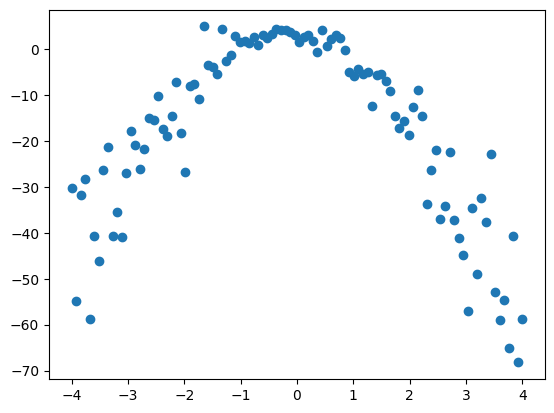

0 tensor([ 0.0100, -0.0100, -0.0100], dtype=torch.float64, requires_grad=True) tensor([1.0100, 1.0100, 0.9900], dtype=torch.float64, requires_grad=True)
10 tensor([ 0.1078, -0.1090, -0.1120], dtype=torch.float64, requires_grad=True) tensor([1.1067, 1.0880, 0.8899], dtype=torch.float64, requires_grad=True)
20 tensor([ 0.1971, -0.2048, -0.2211], dtype=torch.float64, requires_grad=True) tensor([1.1908, 1.0635, 0.7901], dtype=torch.float64, requires_grad=True)
30 tensor([ 0.2746, -0.2996, -0.3406], dtype=torch.float64, requires_grad=True) tensor([1.2596, 0.9877, 0.6940], dtype=torch.float64, requires_grad=True)
40 tensor([ 0.3396, -0.3963, -0.4711], dtype=torch.float64, requires_grad=True) tensor([1.3158, 0.9530, 0.6091], dtype=torch.float64, requires_grad=True)
50 tensor([ 0.3925, -0.4937, -0.6094], dtype=torch.float64, requires_grad=True) tensor([1.3618, 1.0084, 0.5425], dtype=torch.float64, requires_grad=True)
60 tensor([ 0.4361, -0.5867, -0.7482], dtype=torch.float64, requires_grad=Tru

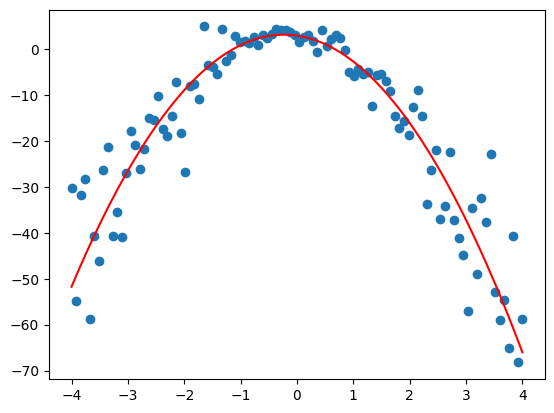

[tensor([ 2.9571, -1.7866, -3.8656], dtype=torch.float64, requires_grad=True), tensor([ 1.1147e+00,  9.8748e-01, -7.2514e-08], dtype=torch.float64,
       requires_grad=True)]


In [53]:

torch.seed = (1)
N = 100
x = torch.linspace(-4, 4, N)
y = (torch.randn(N)-4) * x**2 + (-2+torch.randn(N)) * x + (3+torch.randn(N))

h_1_data = h_1(x)
h_2_data = h_2(x)
h_3_data = h_3(x)
h_all = torch.transpose(torch.stack([h_1_data, h_2_data, h_3_data], 0), 0, 1)

mu = torch.tensor([0., 0., 0.], dtype=float, requires_grad=True)
sigma = torch.tensor([1., 1., 1.], dtype=float, requires_grad=True)
beta = [mu, sigma]

plt.scatter(x, y)
plt.show()

optimizer = torch.optim.Adam(beta,lr=0.01, maximize=True)
for epoch in range(500):
    optimizer.zero_grad()
    loss = log_lik(x, y, beta, h_all)
    loss.backward()
    optimizer.step()
    if epoch%10==0:
        print(epoch, mu, sigma)
mu = beta[0].detach().numpy()
plt.show()
plt.scatter(x,y)
plt.plot(x, mu[2]*x**2+mu[1]*x+mu[0], 'r-')
#plt.plot(x, (aMax-aVar**0.5)*x**2+bMax*x+cMax, 'r--')
#plt.plot(x, (aMax+aVar**0.5)*x**2+bMax*x+cMax, 'r--')
plt.show()
print(beta)